 DataSet loaded successfully! 
                                          image_path  label
0  C:\Users\imran\OneDrive\Robotics Projects\Imag...      0
1  C:\Users\imran\OneDrive\Robotics Projects\Imag...      0
2  C:\Users\imran\OneDrive\Robotics Projects\Imag...      0
3  C:\Users\imran\OneDrive\Robotics Projects\Imag...      0
4  C:\Users\imran\OneDrive\Robotics Projects\Imag...      0

Class Distribution:
 label
0    730
1    730
Name: count, dtype: int64

Total images: 1460


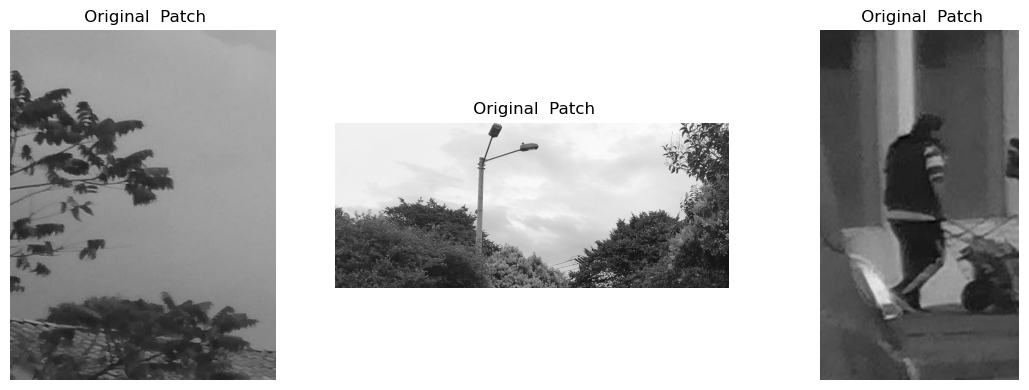

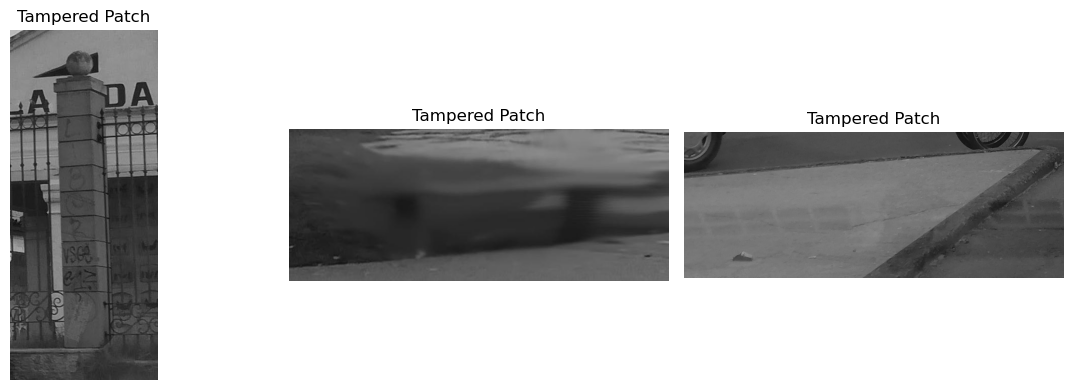

In [7]:
# DataSet Preparation (PHASE 1)

import os
import glob
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# Defining Data Paths
original_path = r"C:\Users\imran\OneDrive\Robotics Projects\Image Forgery\Image Data\TRAINING_CG-1050\TRAINING\ORIGINAL"
tampered_path = r"C:\Users\imran\OneDrive\Robotics Projects\Image Forgery\Image Data\TRAINING_CG-1050\TRAINING\TAMPERED"

# Loading images and then assigning labels
def load_image_paths(original_dir, tampered_dir): # Creating Original and Tampered Directory for images
    data = []

    # Load original images with label 0
    original_images = glob.glob(os.path.join(original_dir,"*.jpg")) # Images are in jpg
    for path in original_images:
        data.append((path,0))

    # Load tampered images with label 1
    tampered_images = glob.glob(os.path.join(tampered_dir, "*.jpg")) # These are also in jpg
    for path in tampered_images:
        data.append((path,1))

    # Now we will create a Dataframe
    df = pd.DataFrame(data, columns = ['image_path', 'label'])
    return df

# Now the function is defined
# We will now load the dataset
train_df = load_image_paths(original_path, tampered_path)

# Previewing Data
print(" DataSet loaded successfully! ")
print(train_df.head())
print("\nClass Distribution:\n", train_df['label'].value_counts())
print(f"\nTotal images: {len(train_df)}") # Total images in the Dataset

# Visualizing a couple of images to check if they are loading
def show_sample_images(df, label_value, n = 3):
    subset = df[df['label'] == label_value].sample(n, random_state = 42)
    label_name = " Original " if label_value == 0 else "Tampered"

    plt.figure(figsize = (12,4))
    for i, row in enumerate(subset.itertuples()):
        img = cv2.imread(row.image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{label_name} Patch")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Displaying images from each class
show_sample_images(train_df, label_value = 0) # Original patch
show_sample_images(train_df, label_value = 1) # Tampered patch